# Simulating the Traffic Signal Control System with two intersections

The layout is intersection 2 to the south of intersection 1.

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Parameters definition

In [8]:
# Define parameters
v = {"w1": 15, "n1": 12, "21": 10, "e1": 15, "w2": 15, "e2": 12, "12": 10, "s2": 15}
beta = {"w1": 0.8, "n1": 0.7, "21": 0.6, "e1": 0.8, "w2": 0.8, "e2": 0.7, "12": 0.6, "s2": 0.8}
d = {"w1": 10, "n1": 5, "21": 7, "e1": 8, "w2": 6, "e2": 7, "12": 1, "s2": 9}
a = {"w1": 0.2, "e1": 0.2, "w2": 0.2, 'e2': 0.3}  # flow assignment multipliers for traffic
b = {"n1": 0.6, "s2": 0.7}  # flow assignment multipliers for traffic

## Time setting and inital state

In [9]:

# Define initial densities for each link
initial_rho = [5, 5, 5, 5, 5, 5, 5, 5]  # rho_w1, rho_n1, rho_21, rho_e1, rho_w2, rho_n2, rho_12, rho_s2

# Time and control settings
time_span = (0, 50)
time_eval = np.linspace(0, 50, 500)
control_step = 5  # Interval (in seconds) at which control phase switches

## Random Controller

In [10]:
# Define control functions for each intersection
def random_control_intersection_1():
    phase1 = (np.random.choice([0, 1]) == 1) 
    return {"w1": int(phase1 == 0), "n1": int(phase1 == 1), "21": int(phase1 == 1), "e1": int(phase1 == 0)}
    

def random_control_intersection_2():
    phase1 = (np.random.choice([0, 1]) == 1)
    return {"w2": int(phase1 == 0), "s2": int(phase1 == 1), "12": int(phase1 == 1), "e2": int(phase1 == 0)}

# Traffic dynamics

In [11]:
# Traffic dynamics with control
def traffic_dynamics(t, rho):
    # Get current control settings (delta values) based on time
    if int(t) % control_step == 0:
        global current_delta1, current_delta2
        current_delta1 = random_control_intersection_1()
        current_delta2 = random_control_intersection_2()
        
    delta1 = current_delta1
    delta2 = current_delta2

    # Unpack densities
    rho_w1, rho_n1, rho_21, rho_e1, rho_w2, rho_n2, rho_12, rho_s2 = rho
    
    # Outflow calculations
    q_w1 = rho_w1 * v["w1"] * beta["w1"]
    q_n1 = rho_n1 * v["n1"] * beta["n1"]
    q_21 = rho_21 * v["21"] * beta["21"]
    q_e1 = rho_e1 * v["e1"] * beta["e1"]
    q_w2 = rho_w2 * v["w2"] * beta["w2"]
    q_e2 = rho_n2 * v["e2"] * beta["e2"]
    q_12 = rho_12 * v["12"] * beta["12"]
    q_s2 = rho_s2 * v["s2"] * beta["s2"]
    
    # Differential equations for each density
    drho_w1_dt = d["w1"] - delta1["w1"] * q_w1
    drho_n1_dt = d["n1"] - delta1["n1"] * q_n1
    drho_e1_dt = d["e1"] - delta1["e1"] * q_e1
    drho_w2_dt = d["w2"] - delta2["w2"] * q_w2
    drho_e2_dt = d["e2"] - delta2["e2"] * q_e2
    drho_s2_dt = d["s2"] - delta2["s2"] * q_s2

    drho_21_dt = delta1["n1"] * q_n1 * b["n1"] + delta1["w1"] * (q_w1 * a["w1"] + q_e1 * a["e1"]) - delta2["12"] * q_21
    drho_12_dt = delta2["s2"] * q_s2 * b["s2"] + delta2["w2"] * (q_w2 * a["w2"] + q_e2 * a["e2"]) - delta1["21"] * q_12
    
    # Return the derivatives
    return [
        drho_w1_dt, drho_n1_dt, drho_21_dt, drho_e1_dt,
        drho_w2_dt, drho_e2_dt, drho_12_dt, drho_s2_dt
    ]

In [12]:
# Solve the differential equations
current_delta1 = random_control_intersection_1()  # Initialize with a random control phase
current_delta2 = random_control_intersection_2()  # Initialize with a random control phase
solution = solve_ivp(traffic_dynamics, time_span, initial_rho, t_eval=time_eval)

## Visualize

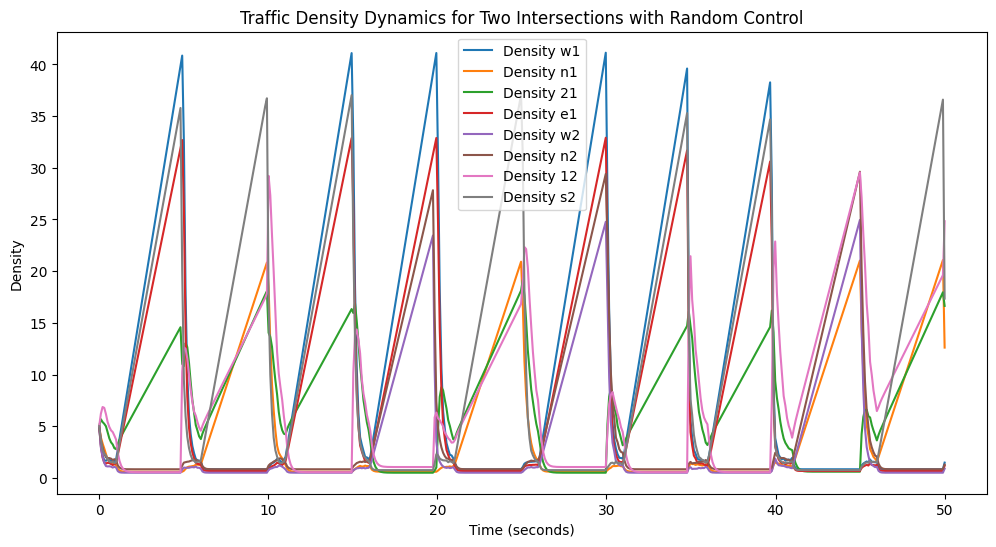

In [13]:
# Plot the densities over time for each link
plt.figure(figsize=(12, 6))
for i, label in enumerate(["w1", "n1", "21", "e1", "w2", "n2", "12", "s2"]):
    plt.plot(solution.t, solution.y[i], label=f"Density {label}")

plt.xlabel("Time (seconds)")
plt.ylabel("Density")
plt.legend()
plt.title("Traffic Density Dynamics for Two Intersections with Random Control")
plt.show()